#  Census Income 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [5]:
df=pd.read_csv("census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.shape

(32560, 15)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

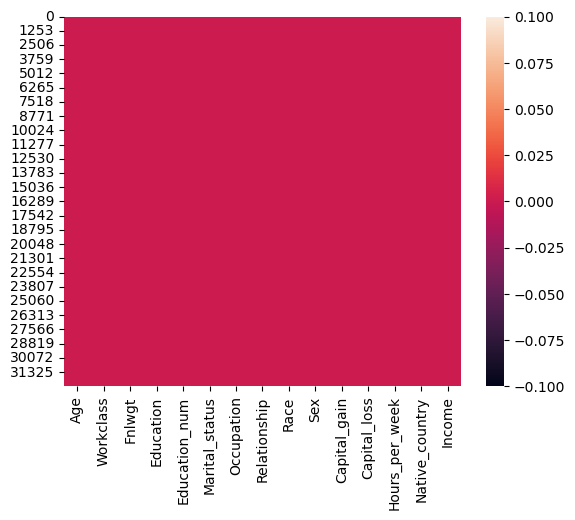

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [13]:
df.duplicated().sum()

24

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [17]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical columns are: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


In [18]:
for i in ccol:
    unique_objects_count = df[i].value_counts()
    print(f"Number of unique values in {i}: {len(df[i].unique())}")
    print(unique_objects_count)
    print()

Number of unique values in Workclass: 9
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Number of unique values in Education: 16
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

Number of unique values in Marital_status: 7
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


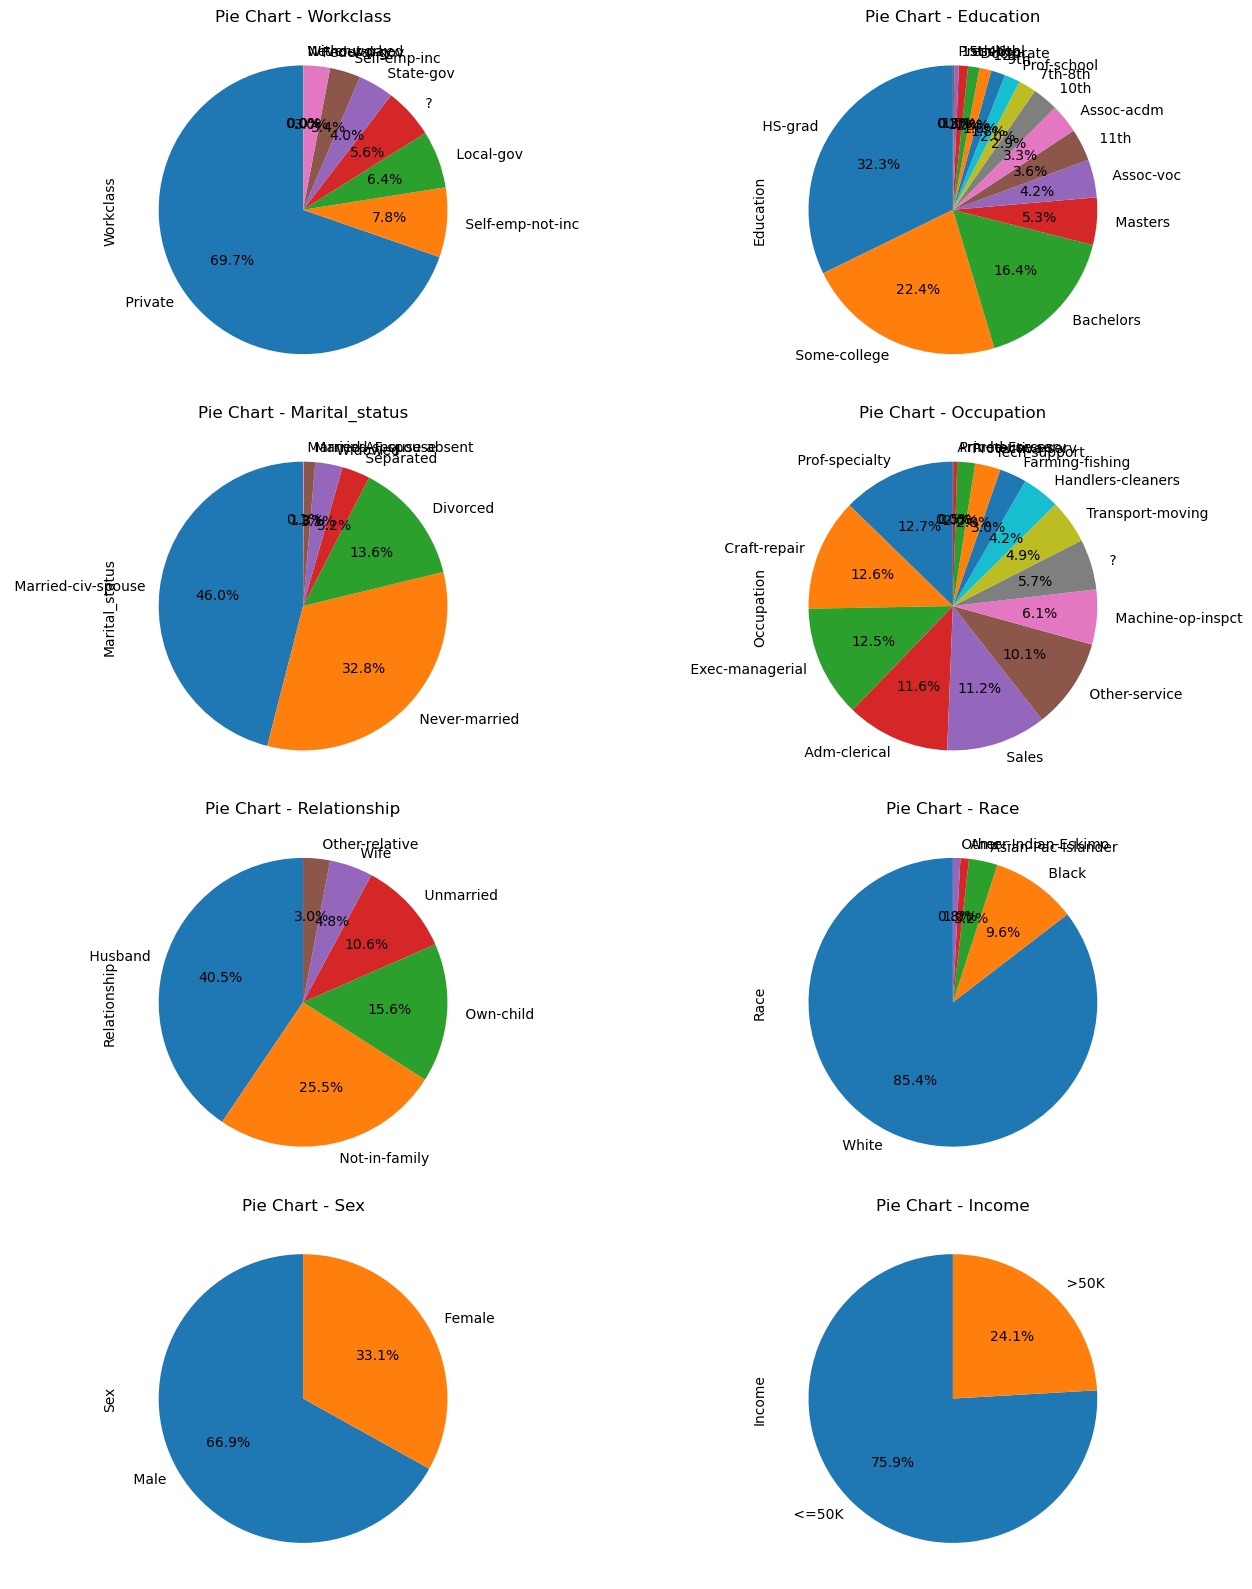

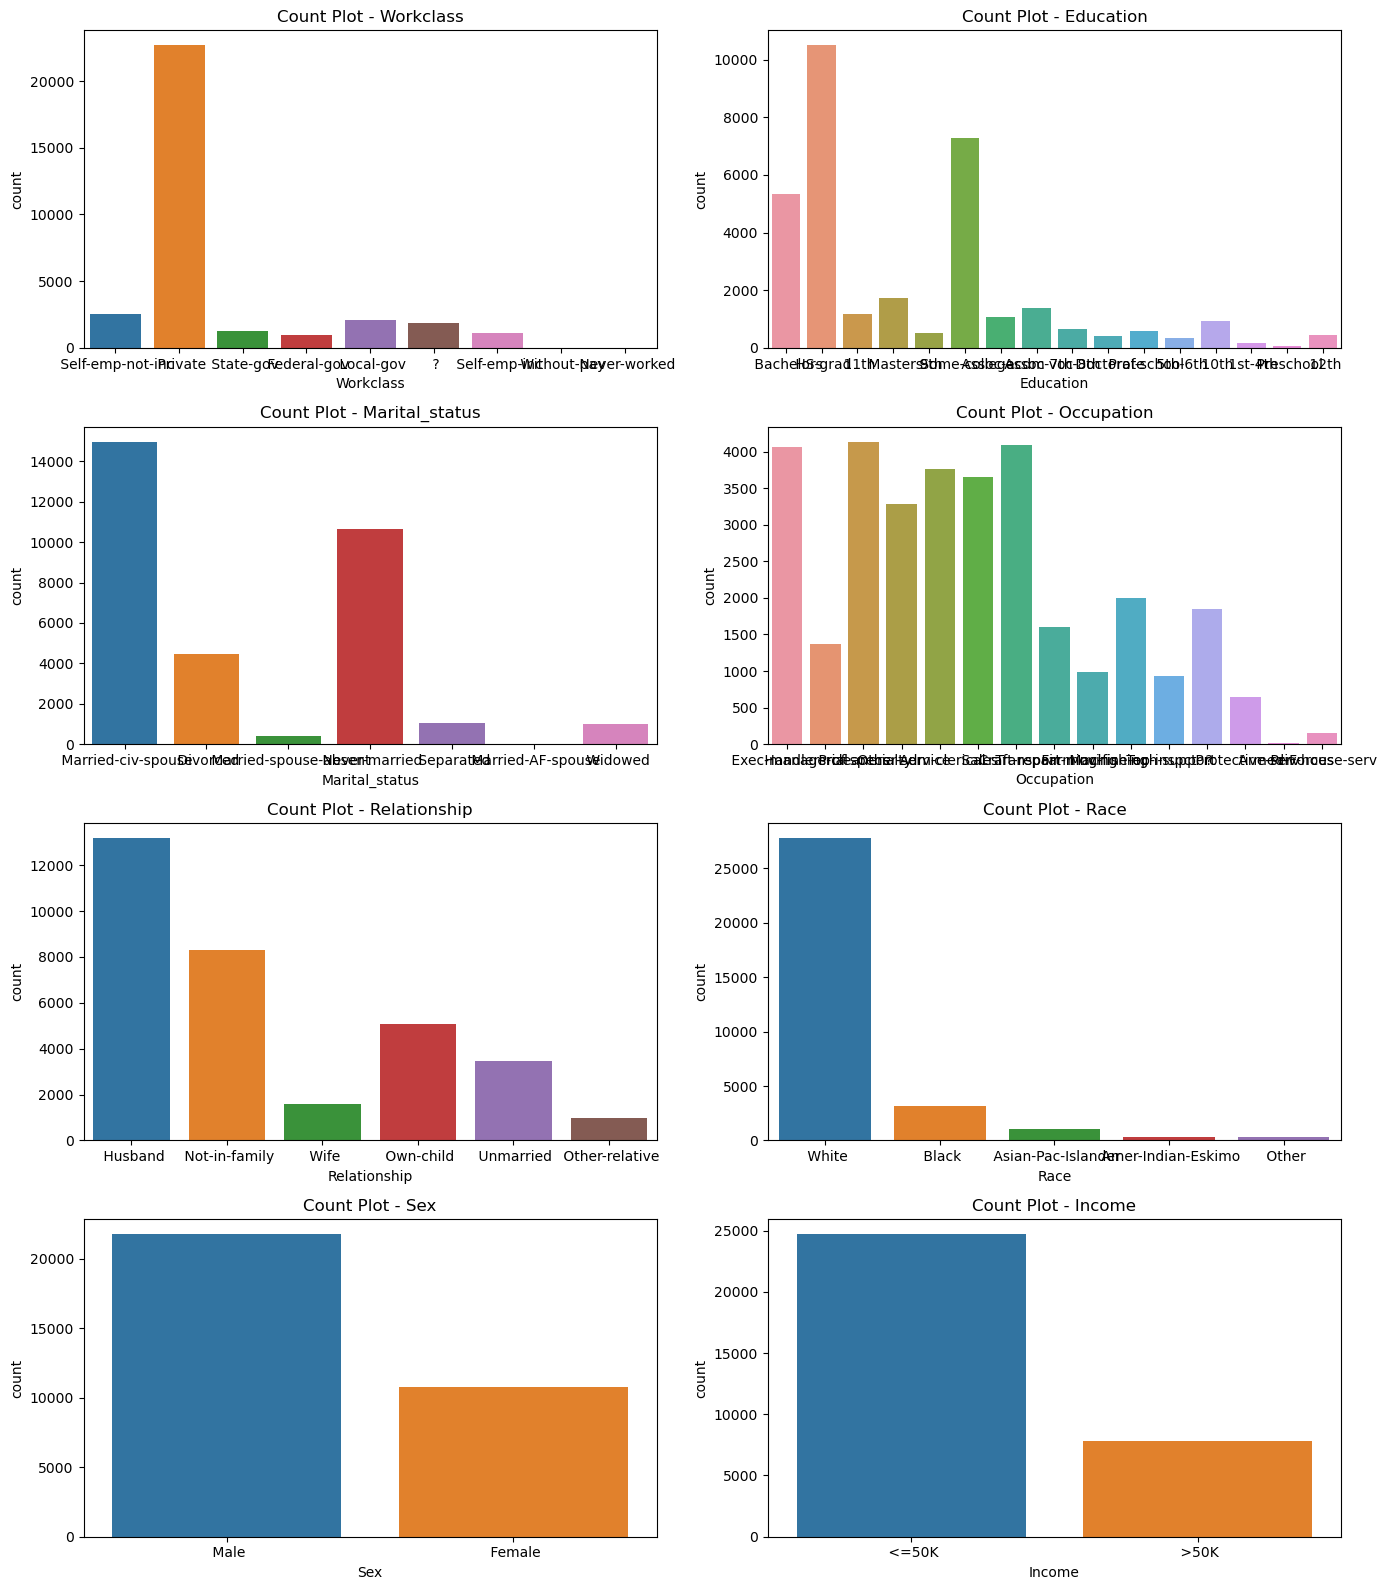

In [21]:
cat=['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Income']
fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()
# for pie
for i, column in enumerate(cat):
    df[column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(f'Pie Chart - {column}') 

plt.tight_layout()
plt.show()
# for count
fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()

for i, column in enumerate(cat):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot - {column}')

plt.tight_layout()
plt.show()


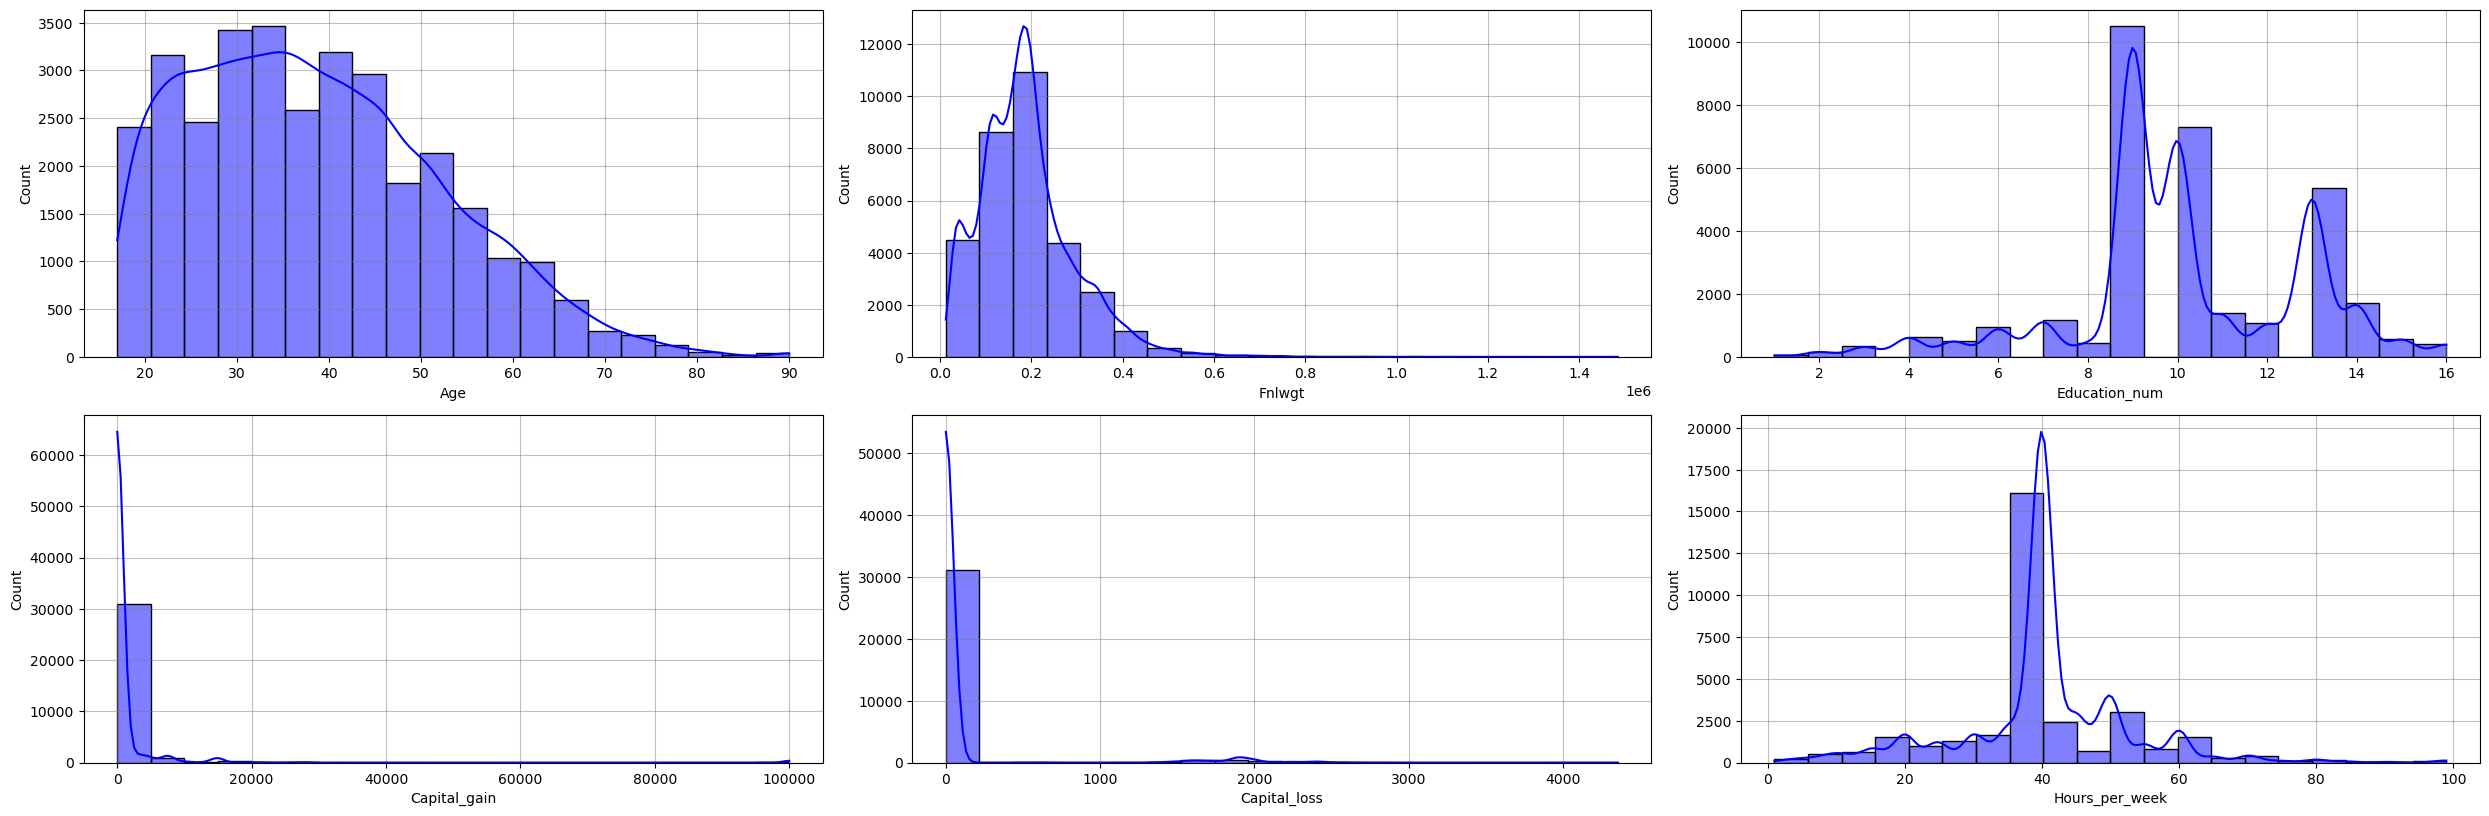

In [23]:
plt.figure(figsize=(25, 20))
pltno = 1

for i in ncol:
    if pltno <= 36:
        ax = plt.subplot(5, 3, pltno)
        sns.histplot(df[i], kde=True, color='blue', bins=20)
        plt.xlabel(i)
        plt.grid(True, alpha=0.5, color='gray')
    pltno += 1

plt.tight_layout()
plt.show()

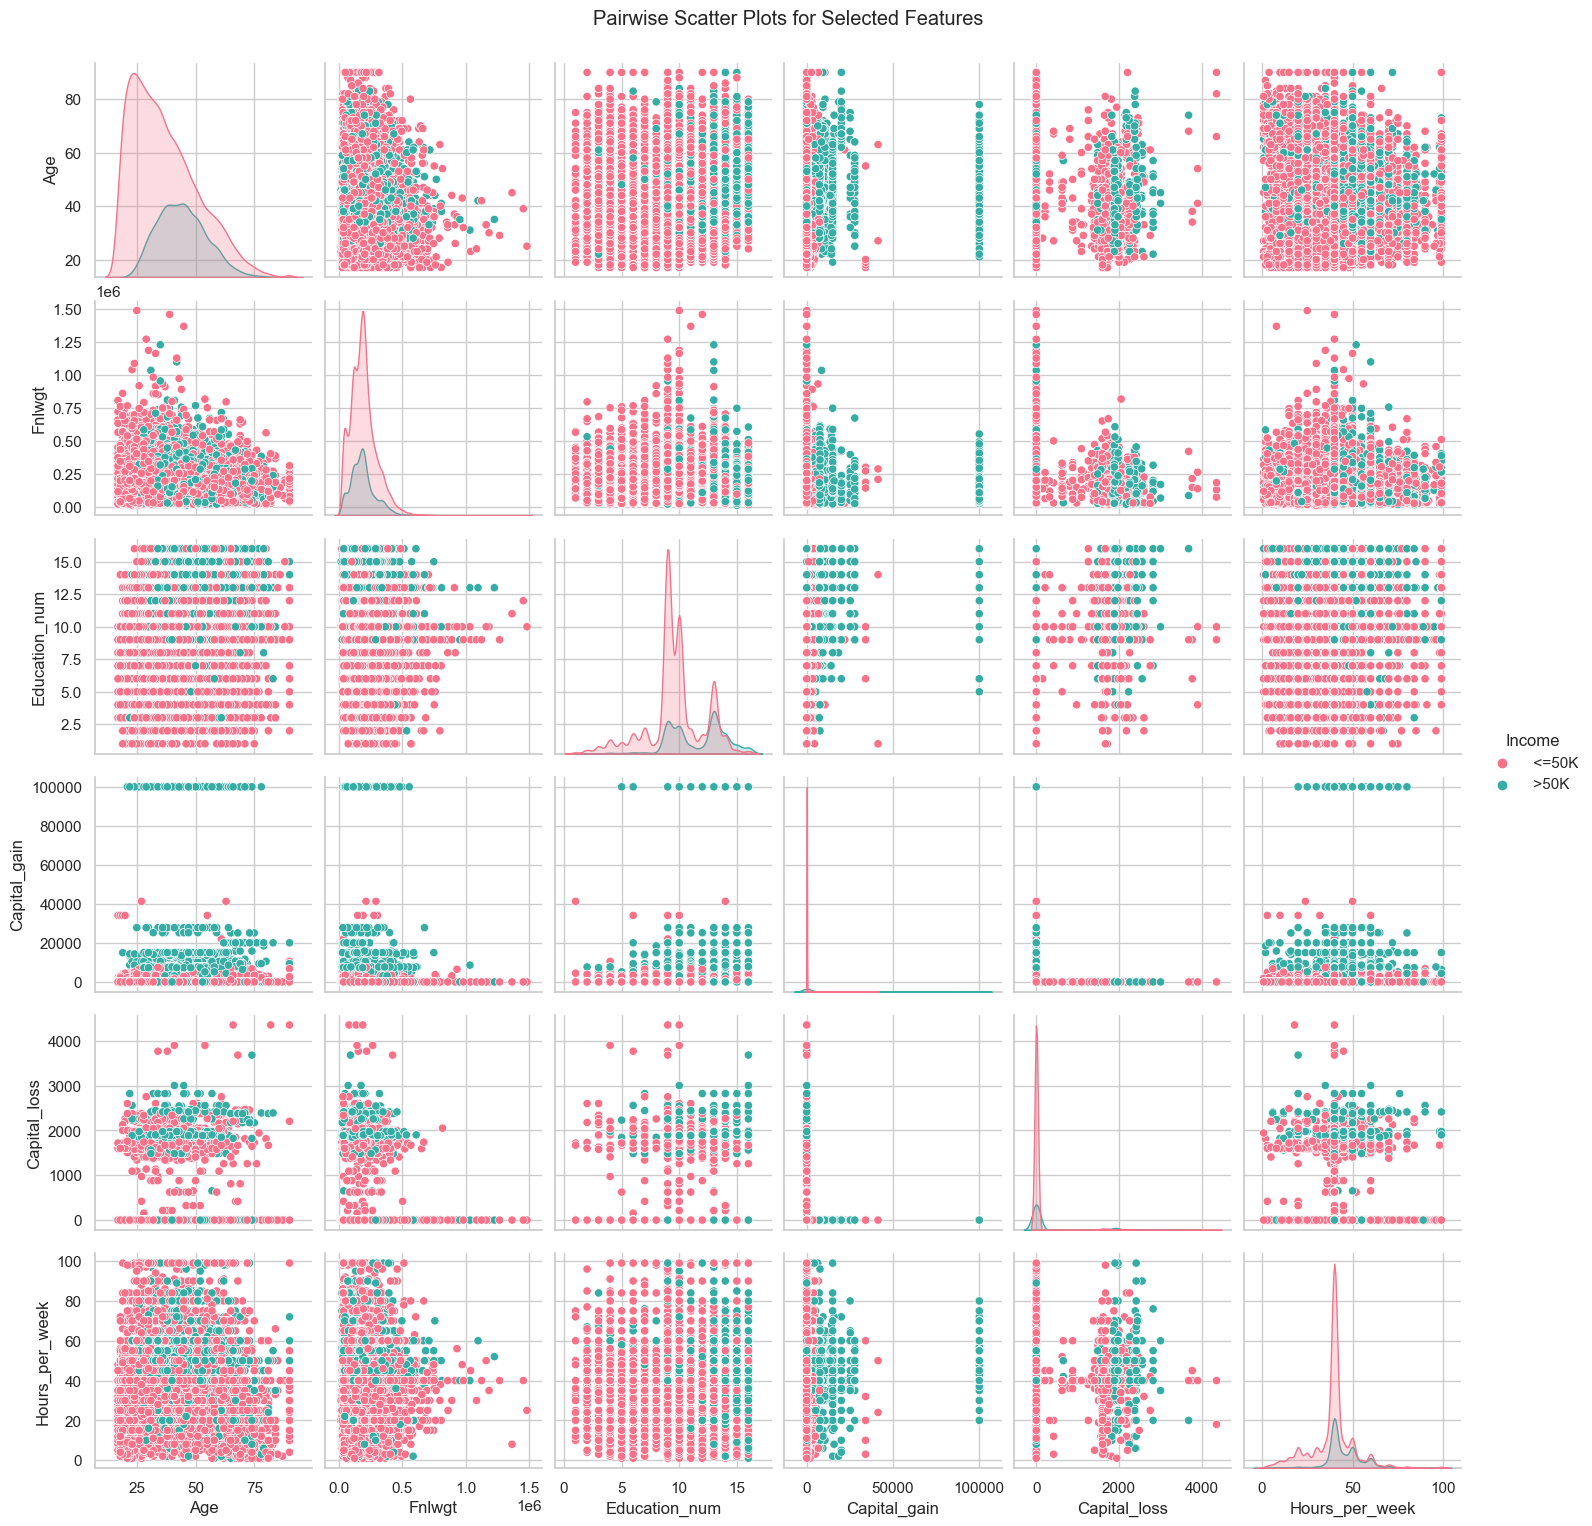

In [24]:
cat = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

sns.set(style="whitegrid")
sns.pairplot(df[cat + ['Income']], hue='Income', palette='husl')
plt.suptitle("Pairwise Scatter Plots for Selected Features", y=1.02)
plt.show()

LabelEncode for categorical data

In [25]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


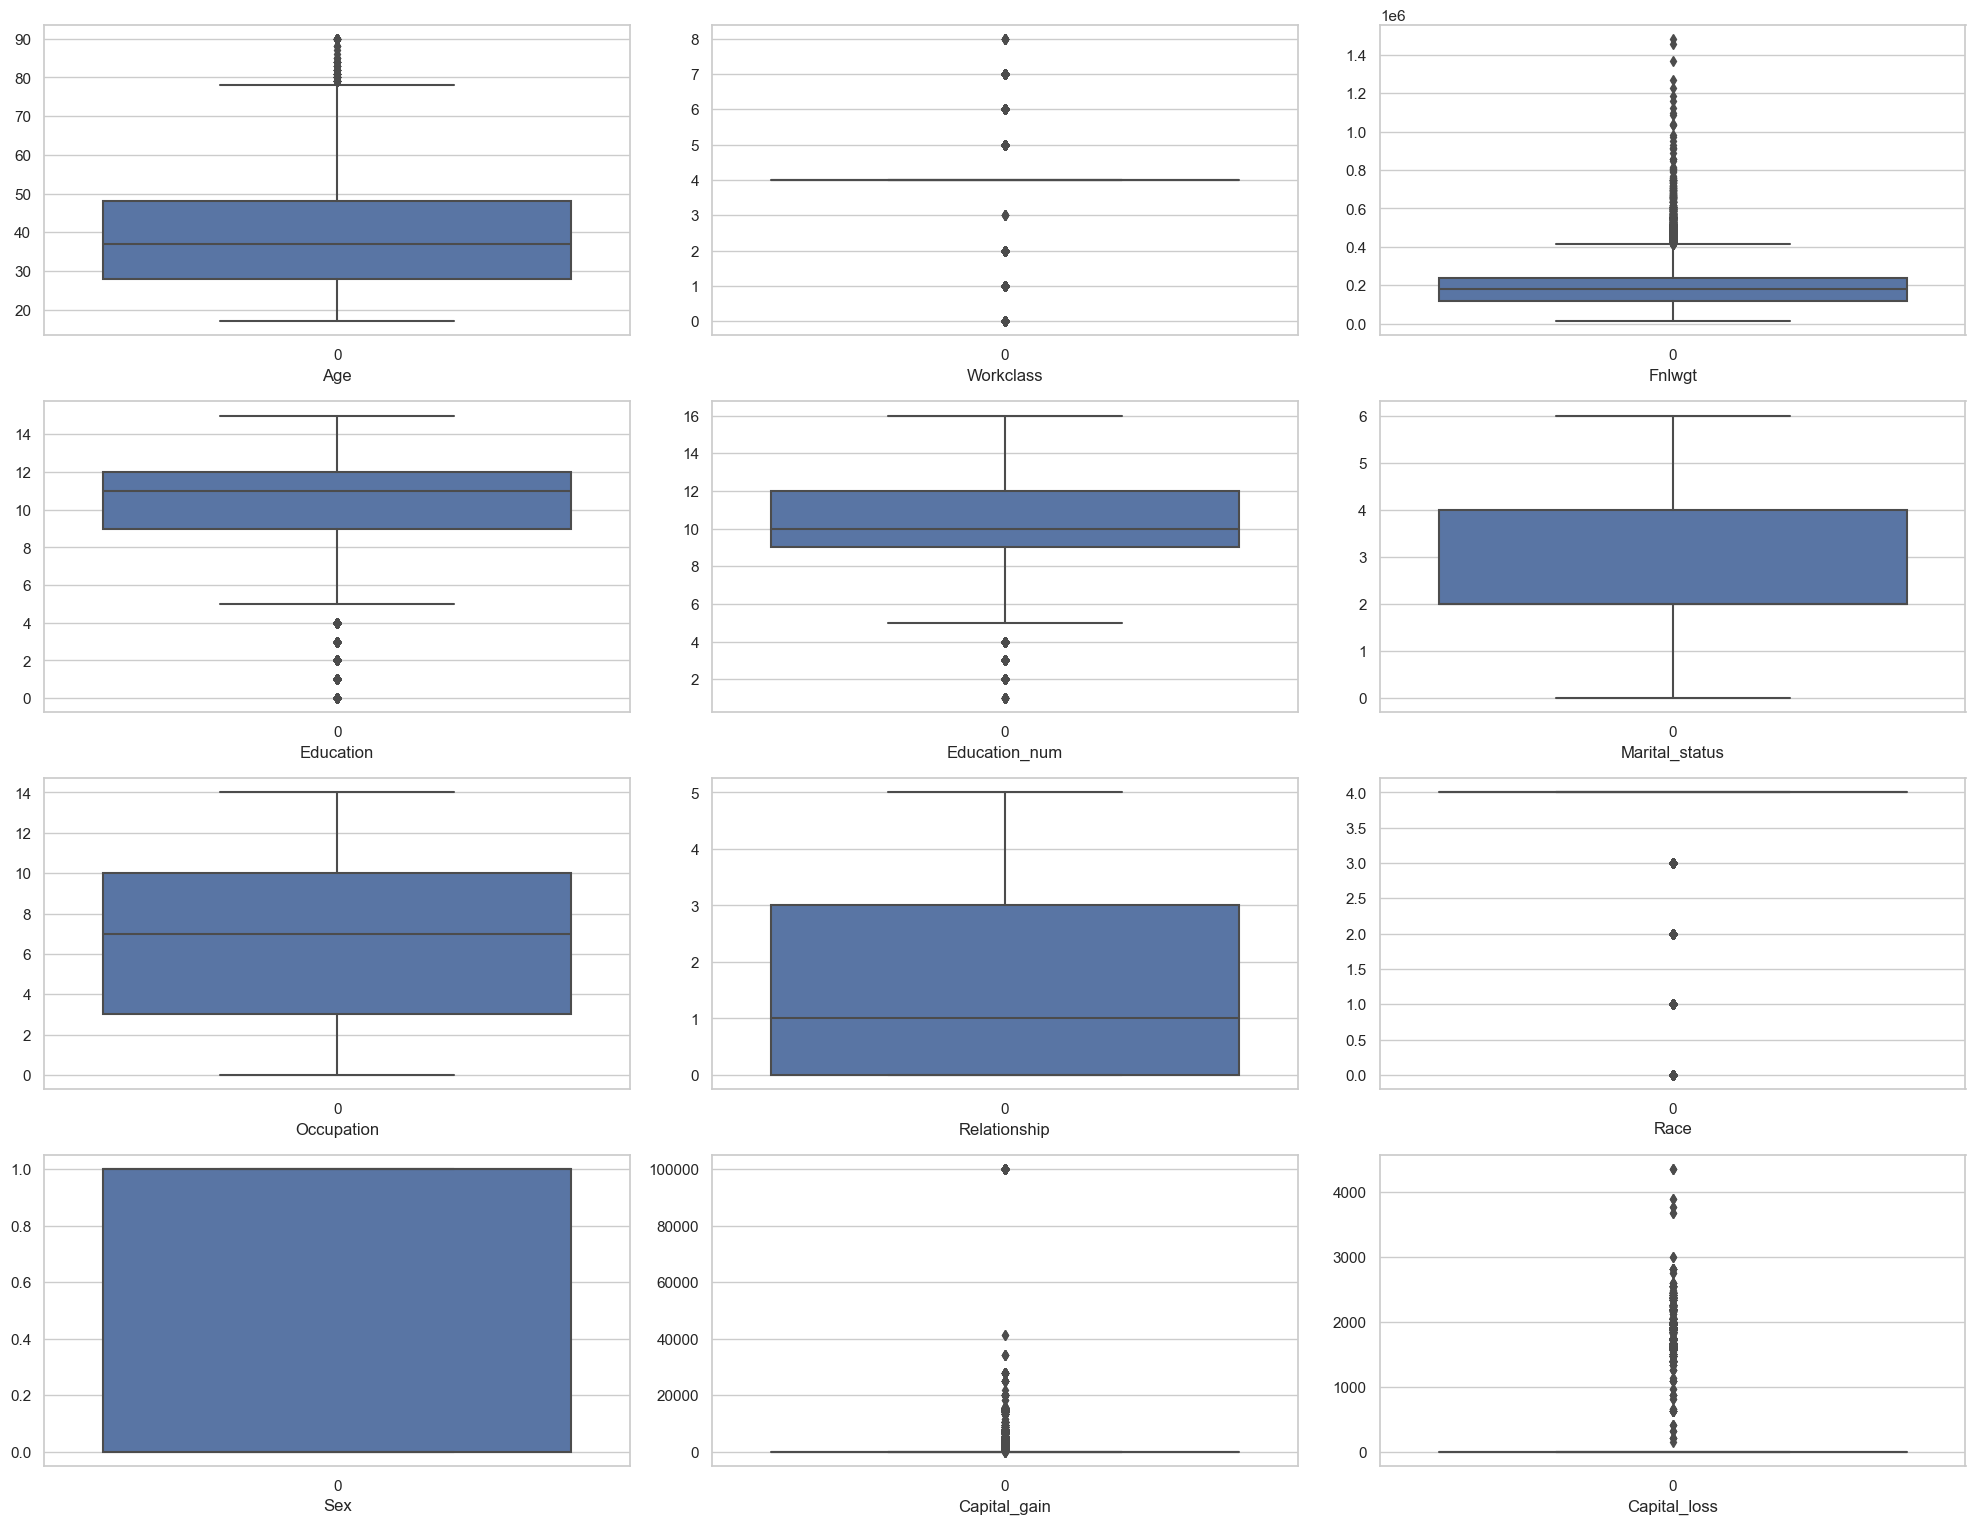

In [26]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [27]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [28]:
col = ['Workclass', 'Education', 'Education_num', 'Capital_gain', 'Capital_loss']
z = np.abs(zscore(df[col]))

threshold = 3
df1 = df[(z < threshold).all(axis=1)]

In [30]:
df1.shape


(30642, 15)

In [31]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  5.821244160314729


In [32]:
df=df1

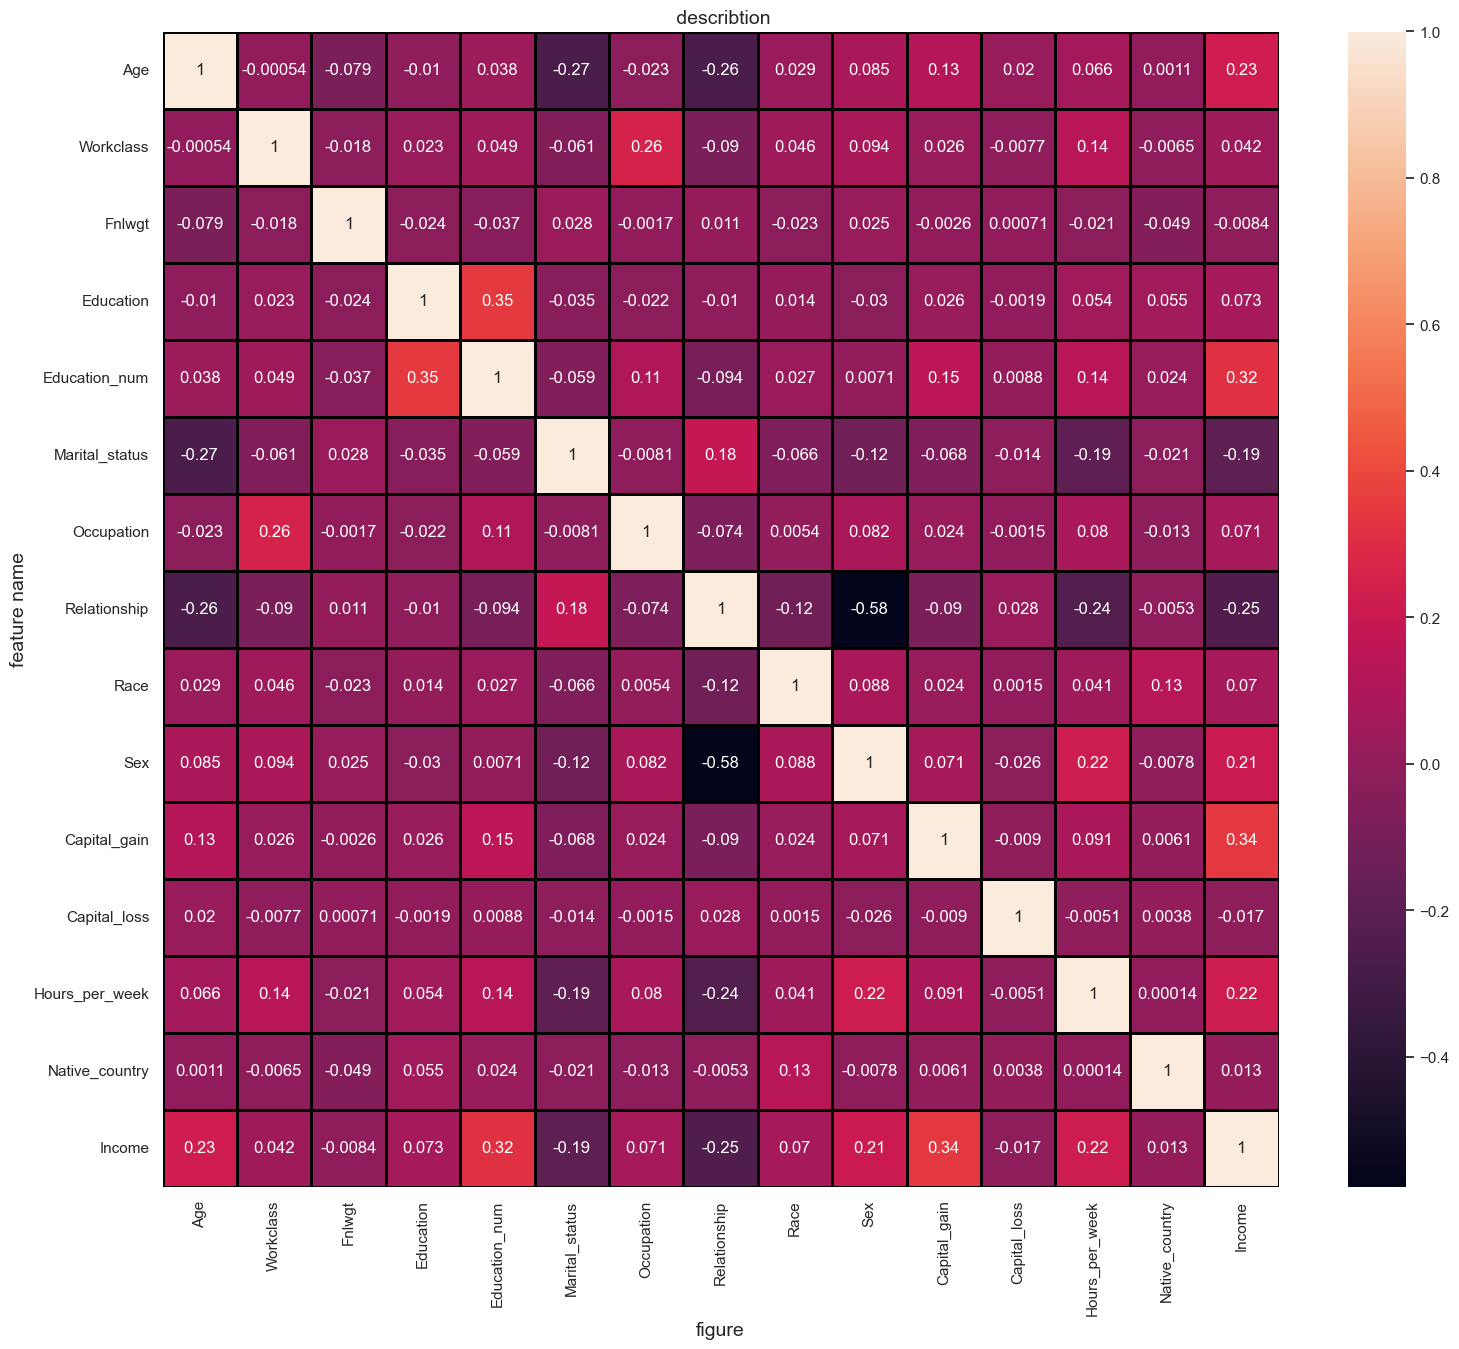

In [33]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

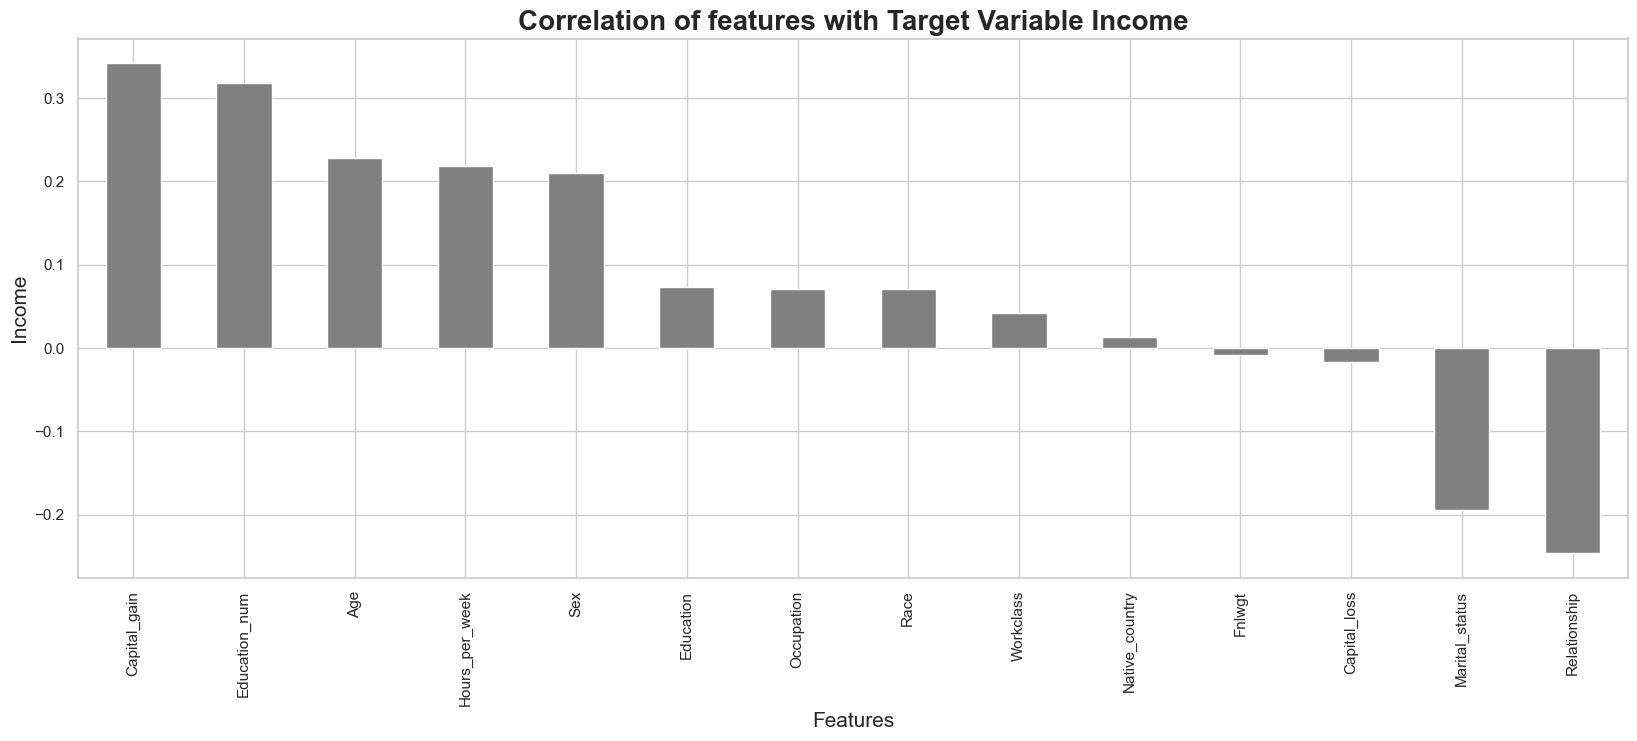

In [34]:
plt.figure(figsize = (20,7))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 20,fontweight='bold')
plt.show()

In [35]:
df.skew()

Age                0.576712
Workclass         -0.751201
Fnlwgt             1.466553
Education         -0.942476
Education_num     -0.170352
Marital_status    -0.039009
Occupation         0.120907
Relationship       0.750733
Race              -2.420435
Sex               -0.688839
Capital_gain       4.938626
Capital_loss      29.889043
Hours_per_week     0.223089
Native_country    -3.737046
Income             1.326263
dtype: float64

In [37]:
col= [ 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
                  'Occupation', 'Relationship', 'Race', 'Capital_gain', 'Capital_loss',
                  'Hours_per_week', 'Native_country']
for column in col:
    if df[column].skew() > 1:
        df[column] = np.log1p(df[column])

In [38]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [39]:
y.value_counts()

0    23788
1     6854
Name: Income, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [41]:
y1.value_counts()

0    23788
1    23788
Name: Income, dtype: int64

In [42]:
print(x.shape, y.shape)

(30642, 14) (30642,)


In [43]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [45]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (21449, 14)
Testing set size -  (9193, 14)


In [46]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [47]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
value.score(x_train,y_train)

0.8674530281131988

In [49]:
value.score(x_test,y_test)

0.8586968345480257

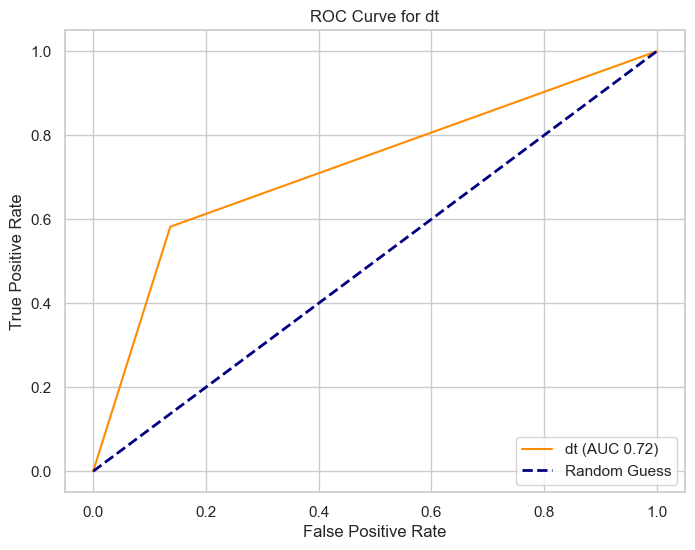


ROC AUC for dt: 0.72


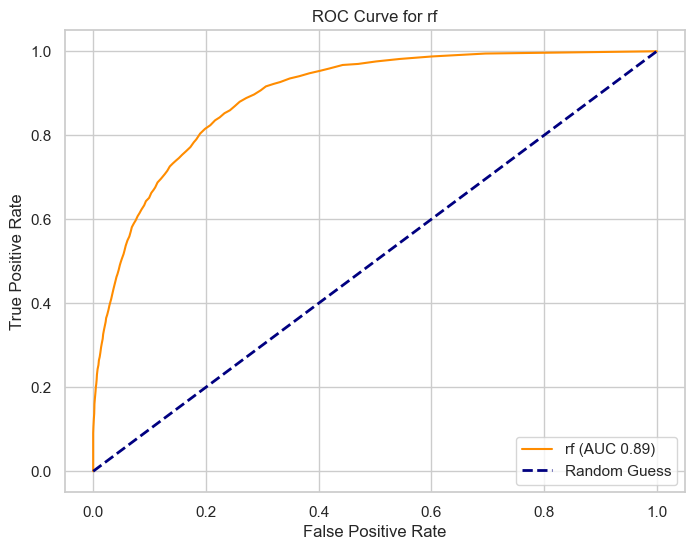


ROC AUC for rf: 0.89


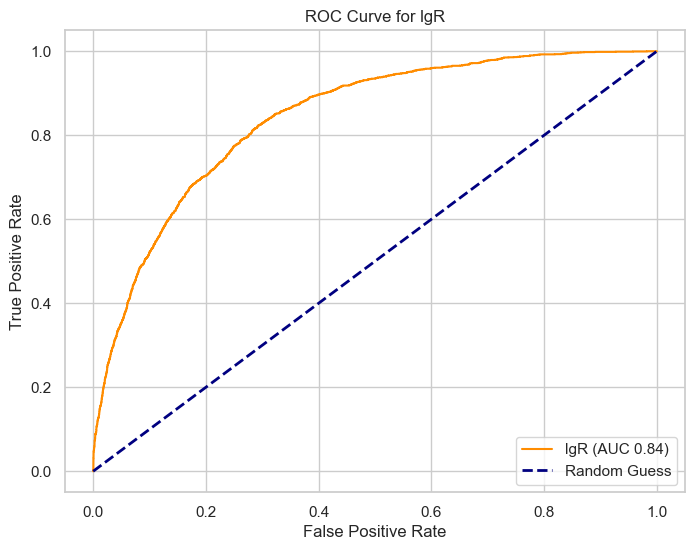


ROC AUC for lgR: 0.84


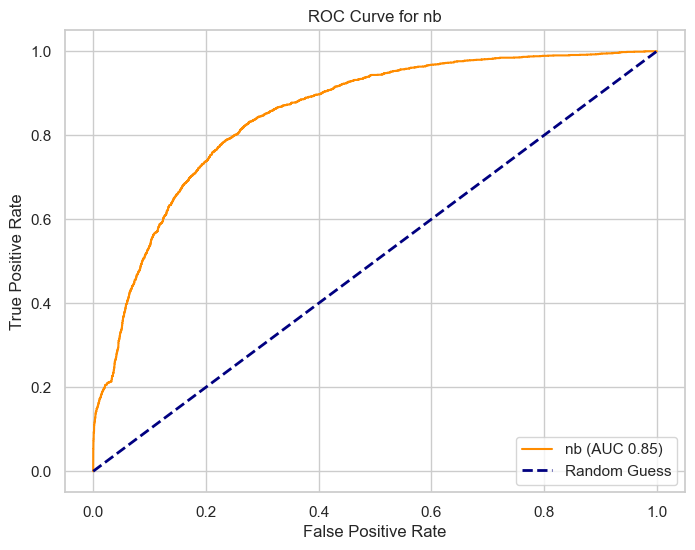


ROC AUC for nb: 0.85


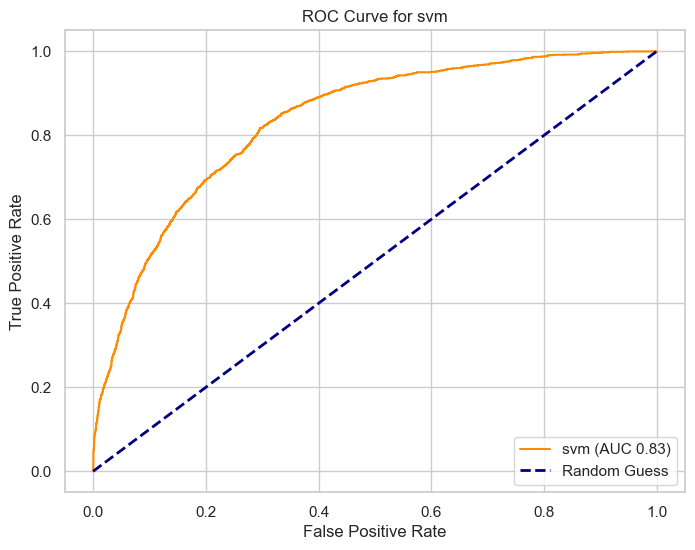


ROC AUC for svm: 0.83


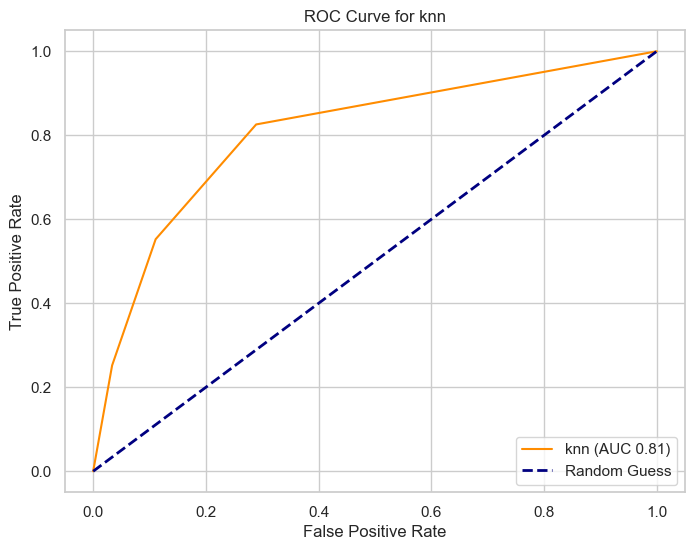


ROC AUC for knn: 0.81


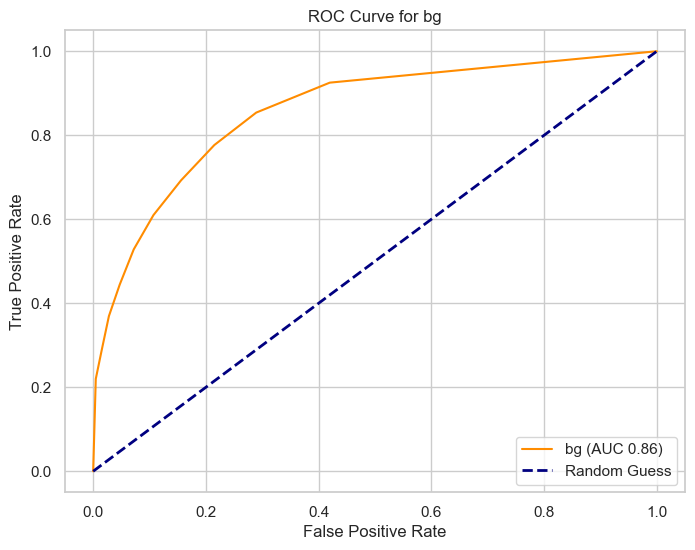


ROC AUC for bg: 0.86


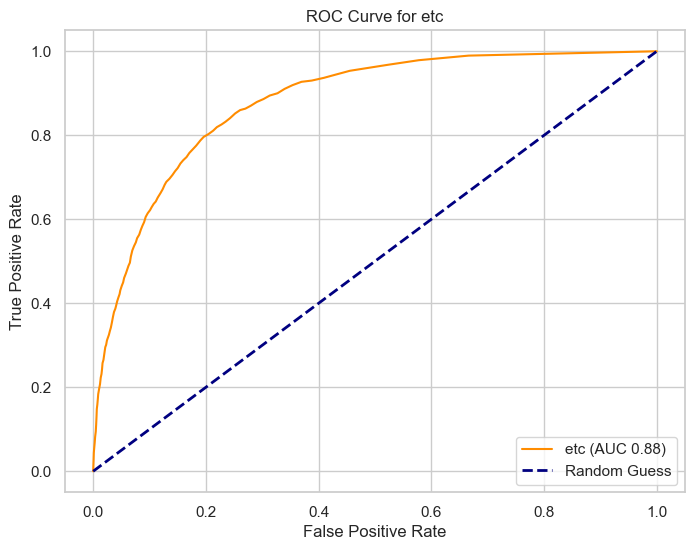


ROC AUC for etc: 0.88


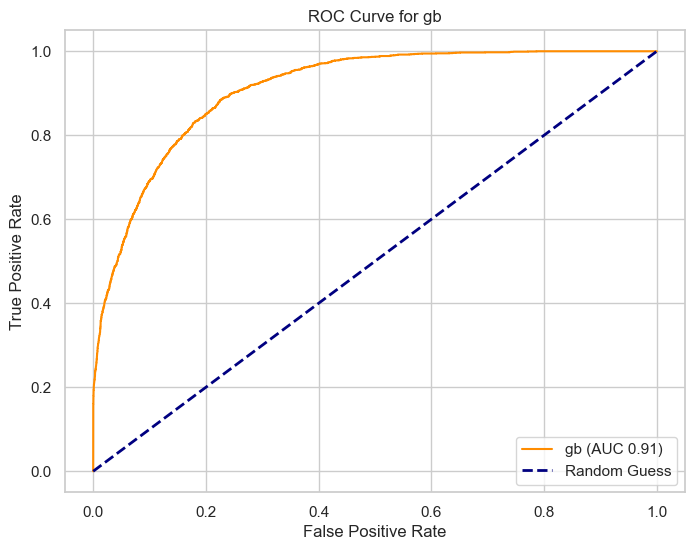


ROC AUC for gb: 0.91

R-squared: {'dt': -0.157891667460347, 'rf': 0.15109093092496206, 'lgR': -0.05257111031052908, 'nb': -0.29493528399264, 'svm': -0.10586585007308758, 'knn': -0.07794955781650925, 'bg': 0.06797651534287685, 'etc': 0.07051436009347489, 'gb': 0.1758349172432928}

Root Mean Squared Error: {'dt': 0.44555652111744426, 'rf': 0.38150429062866964, 'lgR': 0.42480983517595405, 'nb': 0.4711865361790675, 'svm': 0.43543172048509765, 'knn': 0.42990060804410724, 'bg': 0.3997442889816937, 'etc': 0.3991996779808729, 'gb': 0.37590313307017587}

Accuracy: {'dt': 0.8014793864897204, 'rf': 0.8544544762319156, 'lgR': 0.8195366039377787, 'nb': 0.7779832481235723, 'svm': 0.8103992167953878, 'knn': 0.8151854672033069, 'bg': 0.8402045034265202, 'etc': 0.8406396170999674, 'gb': 0.8586968345480257}

Best Model based on Accuracy: gb

Best Model based on RMSE: gb


In [50]:
y_probs = {}
mae = {}
mse = {}
r2 = {}
rmse = {}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value) 

    # Check if predict_proba is available
    if hasattr(model[key], 'predict_proba') and callable(getattr(model[key], 'predict_proba')):
        y_probs[key] = model[key].predict_proba(x_test)[:, 1]
    else:
        # Use decision_function for models that don't support predict_proba
        y_probs[key] = model[key].decision_function(x_test) if hasattr(model[key], 'decision_function') else value

    fpr, tpr, thresholds = roc_curve(y_test, y_probs[key])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label='{} (AUC {:.2f})'.format(key, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {key}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"\nROC AUC for {key}: {roc_auc:.2f}")

print("\nR-squared:", r2)
print("\nRoot Mean Squared Error:", rmse)
print("\nAccuracy:", acu)

best_model = max(acu, key=acu.get)
print("\nBest Model based on Accuracy:", best_model)

best_model_rmse = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model_rmse)


In [52]:
mod=GradientBoostingClassifier()
mod.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
y_pred=mod.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[6785  388]
 [ 911 1109]]


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7173
           1       0.74      0.55      0.63      2020

    accuracy                           0.86      9193
   macro avg       0.81      0.75      0.77      9193
weighted avg       0.85      0.86      0.85      9193



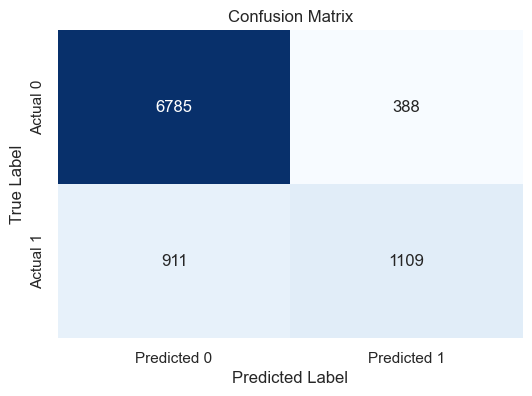

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

True [0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1]
Pred [0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
